In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

In [65]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'emotion_detection.ipynb',
 'test.txt',
 'train.txt',
 'val.txt']

In [7]:
train_df = pd.read_csv('train.txt', header =None, sep =';', names = ['text','emotion'], encoding='utf-8')
test_df = pd.read_csv('test.txt', header = None, sep =';', names = ['text','emotion'],encoding='utf-8')
val_df=pd.read_csv('val.txt',header=None,sep=';',names=['text','emotion'],encoding='utf-8')

In [8]:
train_df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [10]:
train_df.emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

In [11]:
X = train_df["text"]

In [12]:
lst = []
for i in X:
    lst.append(len(i))

In [15]:
max(lst)

300

In [16]:
min(lst)

7

In [17]:
np.mean(lst)

96.8458125

In [18]:
lst2 = []
for i in range(7,301):
    ls = 0
    for l in lst:
        if l==i:
            ls+=1
    lst2.append(ls)

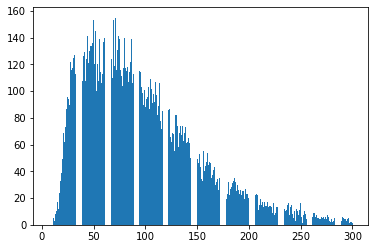

In [23]:
plt.bar(range(7,301),lst2)
plt.show()

### Convert the text into word vectors and prepare X and y train dat

In [24]:
tokenizer = Tokenizer(15212,lower=True,oov_token="UNK")

In [26]:
tokenizer.fit_on_texts(X)

In [27]:
X_train = tokenizer.texts_to_sequences(X)

In [29]:
X_train_padding = pad_sequences(X_train,maxlen=100,padding="post")

In [30]:
X_train_padding

array([[   2,  139,    3, ...,    0,    0,    0],
       [   2,   40,  101, ...,    0,    0,    0],
       [  17, 3060,    7, ...,    0,    0,    0],
       ...,
       [   2,    3,  327, ...,    0,    0,    0],
       [   2,    3,   14, ...,    0,    0,    0],
       [   2,   47,    7, ...,    0,    0,    0]])

In [31]:
train_df['emotion'] = train_df.emotion.replace({"joy":0,'anger':1,"love":2,"sadness":3,"fear":4,"surprise":5})

In [32]:
train_df.head()

,text,emotion
0,i didnt feel humiliated,3
1,i can go from feeling so hopeless to so damned...,3
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


In [33]:
y_train = train_df.emotion.values

In [34]:
y_train

array([3, 3, 1, ..., 0, 1, 3], dtype=int64)

### One hot Encoding the Emotion Values

In [36]:
y_train_one = to_categorical(y_train)

In [38]:
y_train_one.shape

(16000, 6)

In [39]:
X_train_padding.shape

(16000, 100)

### Prepare validation and test data

In [42]:
X_val = val_df.text

In [44]:
X_val.head()

0    im feeling quite sad and sorry for myself but ...
1    i feel like i am still looking at a blank canv...
2                       i feel like a faithful servant
3                    i am just feeling cranky and blue
4    i can have for a treat or if i am feeling festive
Name: text, dtype: object

In [ ]:
val_df['emotion']=val_df.emotion.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [47]:
X_val_t = tokenizer.texts_to_sequences(X_val)

In [48]:
X_val_t_padding = pad_sequences(X_val_t,maxlen=100,padding="post")

In [49]:
y_val = val_df.emotion.values

In [50]:
val_df

,text,emotion
0,im feeling quite sad and sorry for myself but ...,3
1,i feel like i am still looking at a blank canv...,3
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,1
4,i can have for a treat or if i am feeling festive,0
...,...,...
1995,im having ssa examination tomorrow in the morn...,3
1996,i constantly worry about their fight against n...,0
1997,i feel its important to share this info for th...,0
1998,i truly feel that if you are passionate enough...,0


In [51]:
y_val_one = to_categorical(y_val)

In [52]:
y_val_one

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
y_val_one.shape

(2000, 6)

In [54]:
X_val_t_padding.shape

(2000, 100)

In [55]:
X_test = test_df.text

In [56]:
X_test_t = tokenizer.texts_to_sequences(X_test)
X_test_t_padding = pad_sequences(X_test_t,maxlen=100,padding="post")

In [57]:
test_df['emotion']=test_df.emotion.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [58]:
y_test = test_df.emotion.values

In [59]:
y_test_one = to_categorical(y_test)

In [60]:
test_df.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,3
1,im updating my blog because i feel shitty,3
2,i never make her separate from me because i do...,3
3,i left with my bouquet of red and yellow tulip...,0
4,i was feeling a little vain when i did this one,3


In [61]:
X_test_t_padding.shape

(2000, 100)

In [63]:
y_test_one.shape

(2000, 6)

## Creating The Model

In [66]:
model=Sequential()
model.add(Embedding(15212,64,input_length=100))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           973568    
_________________________________________________________________
dropout (Dropout)            (None, 100, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          132000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense (Dense)                (None, 6)                 1542      
Total params: 1,444,006
Trainable params: 1,444,006
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
hist=model.fit(X_train_padding,y_train_one,epochs=10,validation_data=(X_val_t_padding,y_val_one))

Epoch 1/10
500/500 [==============================] - 166s 307ms/step - loss: 1.4344 - accuracy: 0.4102 - val_loss: 0.4698 - val_accuracy: 0.8330
Epoch 2/10
500/500 [==============================] - 155s 310ms/step - loss: 0.4177 - accuracy: 0.8569 - val_loss: 0.2742 - val_accuracy: 0.9085
Epoch 3/10
500/500 [==============================] - 155s 309ms/step - loss: 0.2346 - accuracy: 0.9174 - val_loss: 0.2510 - val_accuracy: 0.9145
Epoch 4/10
500/500 [==============================] - 161s 323ms/step - loss: 0.1620 - accuracy: 0.9398 - val_loss: 0.2035 - val_accuracy: 0.9215
Epoch 5/10
500/500 [==============================] - 157s 314ms/step - loss: 0.1185 - accuracy: 0.9583 - val_loss: 0.2184 - val_accuracy: 0.9210
Epoch 6/10
500/500 [==============================] - 171s 343ms/step - loss: 0.1039 - accuracy: 0.9638 - val_loss: 0.1793 - val_accuracy: 0.9280
Epoch 7/10
500/500 [==============================] - 169s 338ms/step - loss: 0.0882 - accuracy: 0.9672 - val_loss: 0.1876 -

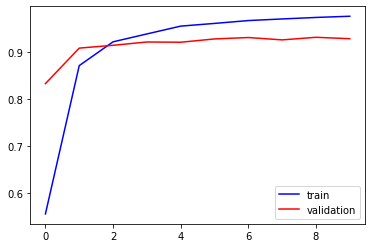

In [72]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

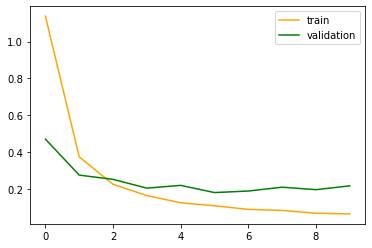

In [71]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

### Check Accuracy for test data

In [76]:
y_test_pred = model.predict_classes(X_test_t_padding)

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [74]:
model.evaluate(X_test_t_padding,y_test_one)

63/63 [==============================] - 5s 84ms/step - loss: 0.2253 - accuracy: 0.9275 1s - loss:


[0.22530052065849304, 0.9275000095367432]

In [79]:
y_test_one

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [82]:
rounded_labels=np.argmax(y_test_one, axis=1)
rounded_labels[0]

3

In [80]:
y_test_pred

array([3, 3, 3, ..., 0, 0, 5], dtype=int64)

In [85]:
y_test_pred.shape

(2000,)

In [84]:
rounded_labels.shape

(2000,)

In [87]:
print(type(y_test_pred))
print(type(rounded_labels))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [86]:
print(classification_report(rounded_labels,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       695
           1       0.93      0.92      0.93       275
           2       0.88      0.73      0.80       159
           3       0.95      0.98      0.96       581
           4       0.92      0.88      0.90       224
           5       0.80      0.79      0.79        66

    accuracy                           0.93      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.93      0.93      0.93      2000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

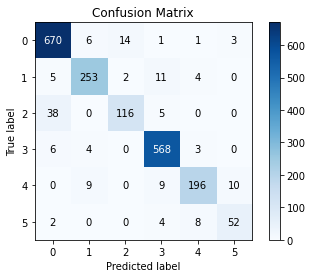

In [88]:
plot_confusion_matrix(rounded_labels,y_test_pred)

## Check Custom input text

In [91]:
def get_emotion(sent):
    emotions_dict = {'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key , value in emotions_dict.items():
        if (value == sent) :
            return key

In [92]:
def predict(text):
    text_list = []
    text_list.append(text)
    text_seq = tokenizer.texts_to_sequences(text_list)
    texts_pad = pad_sequences(text_seq,maxlen=100,padding='post')
    result = get_emotion(model.predict_classes(texts_pad))
    print("The Emotion for this review is ",result)

In [94]:
predict("I hate you")

The Emotion for this review is  anger


In [98]:
predict("love this")

The Emotion for this review is  joy


In [97]:
predict("haha i love it")

The Emotion for this review is  joy


In [99]:
predict("I hope everythings is ok , good bye ")

The Emotion for this review is  joy
